<div style="display: flex; align-items: center;">
    <img src="./img/python-stats.webp" alt="Logo" width="100" style="margin-right: 10px;"/> 
    <h1 style="margin: 0;">Regresión lineal multiple</h1>
</div>

---

**Autor:** Cristiam Loaiza  
**Fecha:** 20 de octubre de 2024  
**Propósito:** Análisis de Datos usando Python y Herramientas Avanzadas

La regresión múltiple es un método estadístico utilizado para modelar la relación entre una variable dependiente (o respuesta) y dos o más variables independientes (o predictoras). En Python, este tipo de regresión se implementa comúnmente utilizando bibliotecas como scikit-learn, statsmodels, o incluso mediante funciones básicas de NumPy.

R_O2

### Conceptos Clave
- Variable dependiente: La variable que se intenta predecir o modelar.
- Variables independientes: Las variables utilizadas como predictores.
- Modelo lineal múltiple: La ecuación del modelo es de la forma

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$




Donde:
- $ Y $: Variable dependiente (lo que se quiere predecir).
- $ X_1, X_2, \dots, X_n $: Variables independientes (predictoras).
- $ \beta_0 $: Intersección (término constante).
- $ \beta_1,  \beta_2, \dots, \beta_n $: Coeficientes de regresión.
- $ \epsilon $: Término de error.

---

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Datos simulados
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 4, 6, 8, 10],
    'Y': [3, 6, 9, 12, 15]
}
df = pd.DataFrame(data)

# Variables independientes y dependiente
X = df[['X1', 'X2']]
y = df['Y']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Coeficientes del modelo
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 0.0
Coeficientes: [0.6 1.2]


### Condiciones para la regresión lineal
Para que un modelo de regresión lineal por mínimos cuadrados, y las conclusiones derivadas de él, sean completamente válidas, se deben verificar que se cumplen las asunciones sobre las que se basa su desarrollo matemático. En la práctica, rara vez se cumplen, o se puede demostrar que se cumplen todas, sin embargo esto no significa que el modelo no sea útil. Lo importante es ser consciente de ellas y del impacto que esto tiene en las conclusiones que se extraen del modelo.


### No colinealidad o multicolinealidad:

En los modelos lineales múltiples, los predictores deben ser independientes, no debe de haber colinealidad entre ellos. La colinealidad ocurre cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo. Como consecuencia de la colinealidad, no se puede identificar de forma precisa el efecto individual que tiene cada predictor sobre la variable respuesta, lo que se traduce en un incremento de la varianza de los coeficientes de regresión estimados hasta el punto de que resulta imposible establecer su significancia estadística. Además, pequeños cambios en los datos, provocan grandes cambios en las estimaciones de los coeficientes. Si bien la colinealidad propiamente dicha existe solo si el coeficiente de correlación simple o múltiple entre predictores es 1, cosa que raramente ocurre en la realidad, es frecuente encontrar la llamada casi-colinealidad o multicolinealidad no perfecta.

### Relación Lineal entre los Predictores Numéricos y la Variable Respuesta

En un modelo de regresión múltiple, es fundamental que cada predictor numérico tenga una relación lineal con la variable respuesta, manteniendo constantes los demás predictores. Si esta relación no es lineal, el predictor no debería incluirse en el modelo sin realizar transformaciones o ajustes.

## Comprobación de la Relación Lineal

La forma más común de verificar la suposición de linealidad es analizar los **residuos del modelo frente a cada predictor**.

### Residuos del Modelo

Los residuos $e_i = y_i - \hat{y}_i$ representan la diferencia entre los valores observados (\(y_i\)) y los valores predichos $\hat{y}_i$:

- **\(e_i\)**: Residuo del \(i\)-ésimo punto.
- **\(y_i\)**: Valor observado del \(i\)-ésimo punto.
- **$\hat{y}_i$**: Valor predicho por el modelo para el \(i\)-ésimo punto.

Si la relación es lineal:
- Los residuos deben distribuirse **aleatoriamente alrededor de cero**.
- La presencia de patrones sugiere una posible relación no lineal.

---

### Gráfica de Residuos Frente a Predictores

La forma más recomendada para evaluar la linealidad es graficar los residuos frente a cada predictor numérico:

1. **Eje \(x\)**: Valores del predictor.
2. **Eje \(y\)**: Valores de los residuos.

#### Interpretación:
- **Distribución aleatoria**: La ausencia de patrones claros (e.g., curvas o tendencias) sugiere que la relación es lineal.
- **Patrones visibles**:
  - Curvas: Indican que la relación no es lineal.
  - Tendencias: Señalan una posible dependencia no modelada.

Esta visualización ayuda a identificar si el predictor debe transformarse o reconsiderarse para incluirlo en el modelo.

---


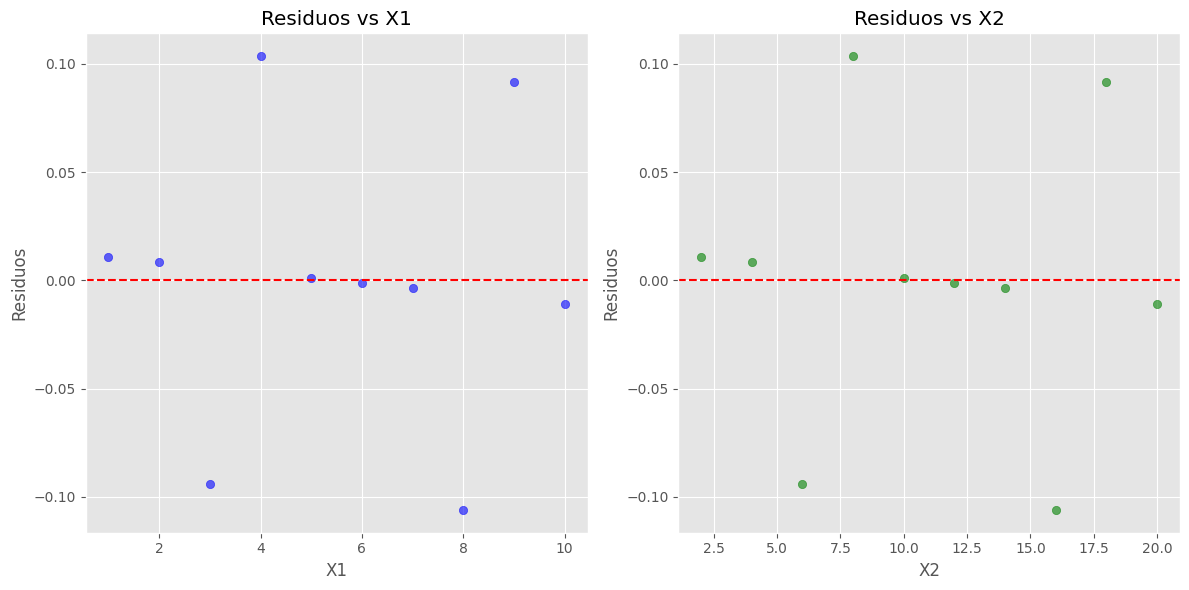

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Datos simulados
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Y': [1.1, 2.1, 3.0, 4.2, 5.1, 6.1, 7.1, 8.0, 9.2, 10.1]
}
df = pd.DataFrame(data)

# Variables independientes y dependiente
X = df[['X1', 'X2']]
y = df['Y']

# Entrenar modelo
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calcular residuos
residuals = y - y_pred

# Graficar residuos frente a los predictores
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(df['X1'], residuals, color='blue', alpha=0.6)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuos vs X1')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('Residuos')

axs[1].scatter(df['X2'], residuals, color='green', alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuos vs X2')
axs[1].set_xlabel('X2')
axs[1].set_ylabel('Residuos')

plt.tight_layout()
plt.show()


## Coeficientes de Correlación Lineal

Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, entre los que destacan:

- **Coeficiente de Pearson**
- **Rho de Spearman**
- **Tau de Kendall**

### Características Comunes
- **Rango**: Su valor está comprendido entre \([+1 , -1]\), donde:
  - \(+1\): Correlación positiva perfecta.
  - \(-1\): Correlación negativa perfecta.
- **Interpretación**: Miden la fuerza de la asociación entre dos variables (\*tamaño del efecto\*):
  - \(0\): Asociación nula.
  - \(0.1\): Asociación pequeña.
  - \(0.3\): Asociación mediana.
  - \(0.5\): Asociación moderada.
  - \(0.7\): Asociación alta.
  - \(0.9\): Asociación muy alta.

---

### Diferencias Principales entre los Coeficientes

#### 1. **Correlación de Pearson**
- Se utiliza con **variables cuantitativas** que tienen una distribución **normal** o cercana a la normal.
- Es más sensible a **valores extremos** que las otras alternativas.
  
#### 2. **Correlación de Spearman**
- Se aplica a **variables cuantitativas** (continuas o discretas).
- Los valores son ordenados y reemplazados por su respectivo **ranking**.
- Es un método **no paramétrico** ideal cuando:
  - La normalidad de las variables no está garantizada.

#### 3. **Correlación de Kendall**
- También es una alternativa **no paramétrica** que utiliza el **ranking** de las observaciones.
- Recomendable cuando:
  - Se dispone de pocos datos.
  - Existen muchas observaciones con la misma posición en el rango (ligaduras).

---


## Correlación para Determinar Predictores en Regresión Lineal Múltiple

En los modelos de regresión lineal múltiple, es fundamental evaluar la relación entre las variables independientes para identificar posibles problemas de colinealidad o multicolinealidad. A continuación, se explica cómo la correlación puede ayudar en este análisis.

## Cálculo de la Matriz de Correlación
- La matriz de correlación contiene los coeficientes de correlación de Pearson (\(r\)) entre cada par de variables independientes.
- Valores de \(r\):
  - \(r = 1\): Relación lineal positiva perfecta.
  - \(r = -1\): Relación lineal negativa perfecta.
  - \(r = 0\): No hay relación lineal.

### Ejemplo en Python
```python
import pandas as pd

# Simular datos
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 4, 6, 8, 10],
    'X3': [5, 7, 6, 8, 7]
}
df = pd.DataFrame(data)

# Matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)


Si ∣𝑟∣>0.8, podría haber colinealidad.

### Ejemplo 

Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.

In [16]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from statsmodels.stats.anova import anova_lm
#from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Datos
# ==============================================================================
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})

### Relación entre variables
El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.

In [19]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


corr_matrix = datos.select_dtypes(include=['float', 'int']).corr(method='pearson')
corr_matrix_2 = datos[['tv','radio','otra_columna']].corr(method='pearson')



tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
3,tv,ventas,0.782224,0.782224
12,ventas,tv,0.782224,0.782224
7,radio,ventas,0.576223,0.576223
13,ventas,radio,0.576223,0.576223
9,periodico,radio,0.354104,0.354104
6,radio,periodico,0.354104,0.354104
14,ventas,periodico,0.228299,0.228299
11,periodico,ventas,0.228299,0.228299
2,tv,periodico,0.056648,0.056648
8,periodico,tv,0.056648,0.056648


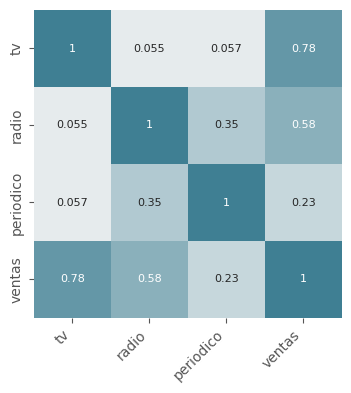

In [20]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [23]:
# División de los datos en train y test
# ==============================================================================
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
import sklearn.linear_regression as lr

# Creación del modelo
# ==============================================================================
modelo = lr.LinearRegression()
modelo.fit(X = X_train, y = y_train)
